# Assignment 61

#### Q1. What is the mathematical formula for a linear SVM?

#### Ans. y=transpose(w).x+b
#### Here 
* transpose(w)=slope of best fit line
* b=intercept 

#### Q2. What is the objective function of a linear SVM?

#### Ans. The objective function is to minimize cost function
#### cost function= ||w||/2
#### minimize the cost function by changing value of slope and intercept

#### Q3. What is the kernel trick in SVM?

#### Ans.A Kernel Trick is a simple method where a Non Linear data is projected onto a higher dimension space so as to make it easier to classify the data where it could be linearly divided by a plane. 

#### Q4. What is the role of support vectors in SVM Explain with example

#### Ans.Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. 

#### SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages. This is one of the reasons we use SVMs in machine learning. It can handle both classification and regression on linear and non-linear data

#### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

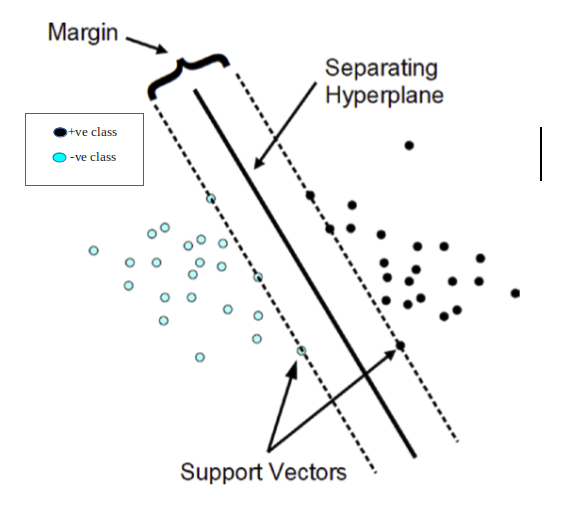](attachment:8232a93b-1a93-48d1-9cb5-87d9382f3022.png)
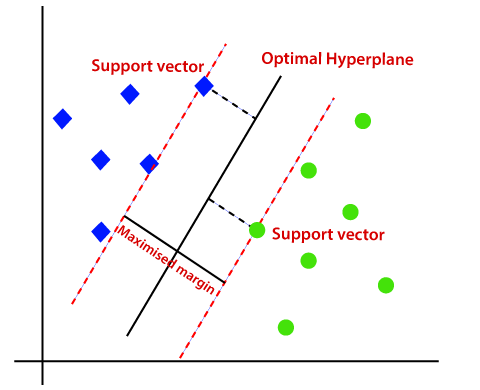

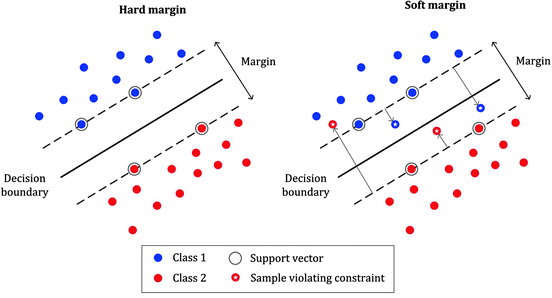](attachment:fdaa9c05-8a33-417a-aa1d-3e2325c31e31.png)
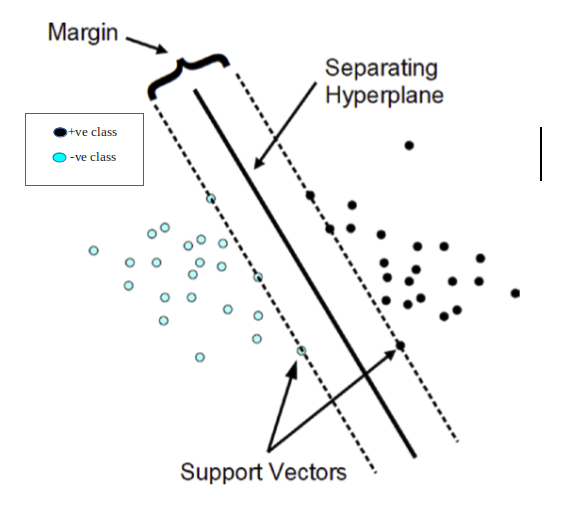

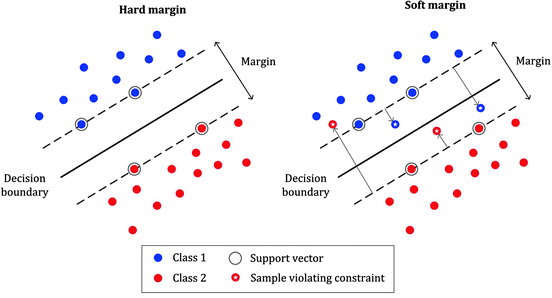

#### Q6. SVM Implementation through Iris dataset.
#### Ans. Steps to be followed are
1. Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
2. Train a linear SVM classifier on the training set and predict the labels for the testing setl
3. Compute the accuracy of the model on the testing setl
4. Plot the decision boundaries of the trained model using two of the featuresl
5. Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [41]:
from sklearn.datasets import load_iris

In [42]:
dataset=load_iris()

In [43]:
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [44]:
df['Target'] = dataset.target

In [45]:
# independent and dependent features
# We are taking only two independent features
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [46]:
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [47]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [49]:
from sklearn.svm import SVC

In [50]:
svc=SVC(kernel='linear')

In [51]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [52]:
y_pred=svc.predict(X_test)

In [53]:
# Let's check the accuracy of model
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred)*100)

Accuracy Score:  80.0


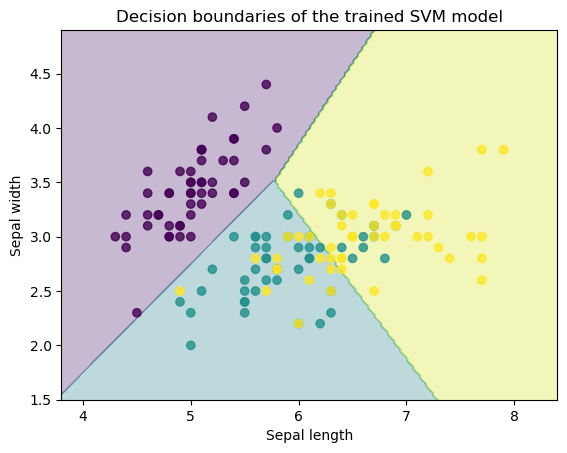

In [54]:
# decision boundary
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x_min, x_max = df.iloc[:, 0].min() - 0.5, df.iloc[:, 0].max() + 0.5
y_min, y_max = df.iloc[:, 1].min() - 0.5, df.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y, alpha=0.8)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Decision boundaries of the trained SVM model")
plt.show()

## Hyperparameter Tunning

In [55]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid=GridSearchCV(svc,param_grid=parameters,refit=True,cv=5,verbose=3)

In [59]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.714 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.762 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.714 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.714 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.762 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.952 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.714 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [60]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [61]:
y_pred_grid=grid.predict(X_test)

In [62]:
y_pred_grid

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0,
       0])

In [63]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred_grid)*100)


Accuracy Score:  82.22222222222221


In [64]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
values = [[5.1,3.5]]
op = grid.predict(values)

In [66]:
if op[0] == 0:
    print("Iris Setosa-",op[0])
elif op[0] == 1:
    print("Iris Versicolour-",op[0])
else:
    print("Iris Virginica-",op[0])

Iris Setosa- 0
